In [1]:
from database.market import Market
from database.strategy import Strategy
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
market = Market()
strategy = Strategy()

In [3]:
strategy.connect()
trades = strategy.retrieve("quarterly_trades")
strategy.disconnect()

In [4]:
t= trades.drop("_id",axis=1)

In [5]:
t["value"].unique()

array([ True, False])

In [6]:
a = []
seats = 10
for number_of_training_weeks in tqdm(range(14,69,14)):
    for weekly_model_training_year in tqdm(range(1,6)):
        for weekly_category_training_year in tqdm(range(1,5)):
            for delta in tqdm(range(0,15,5)):
                d = delta/100
                for what in range(2):
                    value = what == 1 
                    for score in tqdm(range(60,100,10)):
                        try:
                            score_trades = t[(t["score"]==score) & 
                                             (t["d"]==d) & 
                                            (t["wcty"]==weekly_category_training_year) & 
                                             (t["wmty"]==weekly_model_training_year) &
                                            (t["tw"]==number_of_training_weeks) &
                                            (t["value"]==value)]
                            cash = []
                            for seat in range(seats):
                                initial = float(100 / seats)
                                seat_trades = score_trades[score_trades["seat"]==seat]
                                for delta in seat_trades["delta"]:
                                    initial = initial * (1+delta)
                                    cash.append(initial)
                                analysis = {}
                                analysis["score"] = score
                                analysis["trades"] = seat_trades.index.size
                                if seat_trades.index.size > 0:
                                    analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
                                    seat_trades["hpr"] = (seat_trades["sell_date"] - seat_trades["date"])
                                    seat_trades["hpr"] =[x.days for x in seat_trades["hpr"]]
                                    analysis["hpr"] = seat_trades["hpr"].mean()
                                    analysis["seat"] = seat
                                    analysis["d"] = d
                                    analysis["wcty"] = weekly_category_training_year
                                    analysis["wmty"] = weekly_model_training_year
                                    analysis["tw"] = number_of_training_weeks
                                    analysis["value"] = value
                                    analysis["pv"] = initial
                                    a.append(analysis)
                        except Exception as e:
                            print(str(e))
                            continue

  0%|                                                                                                                                             | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3996.48it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 166.63it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4001.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3996.48it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 166.63it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3996.48it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4002.20it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 47.05it/s]


'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3996.48it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4001.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4001.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 157.85it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.48it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.96it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4001.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 46.50it/s]

 40%|█████████████████████████████████████████████████████▏                                                                               | 2/5 [00:00<00:00, 11.63it/s]

'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 799.64it/s]

'wcty'
'wcty'
'wcty'
'wcty'







100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1565.18it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]

'wcty'
'wcty'
'wcty'
'wcty'







100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.40it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.41it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 40.39it/s]


'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]



'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.36it/s]


'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.32it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.77it/s]



'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]

'wcty'
'wcty'
'wcty'
'wcty'



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 99.98it/s]



  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.66it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.83it/s]


'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.89it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]

'wcty'
'wcty'
'wcty'
'wcty'



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 103.42it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 33.89it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 4/5 [00:00<00:00,  9.96it/s]

  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00

'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.40it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.40it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4000.29it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]

'wcty'
'wcty'
'wcty'
'wcty'



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]



  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






 25%|█████████████████████████████████▎                                                                                                   | 1/4 [00:00<00:01,  2.02it/s]

'wcty'
'wcty'
'wcty'
'wcty'



  0%|                                                                                                                                             | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.32it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]

'wcty'
'wcty'
'wcty'
'wcty'







100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 136.33it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 136.33it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]

'wcty'
'wcty'
'wcty'
'wcty'



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 40.81it/s]


  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 142.83it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3995.53it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 150.74it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 142.82it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 43.95it/s]

 40%|█████████████████████████████████████████████████████▏                                                                               | 2/5 [00:00<00:00, 10.47it/s]

'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.58it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.41it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.98it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4001.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4000.29it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 157.85it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4001.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3997.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]

'wcty'
'wcty'
'wcty'
'wcty'



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 42.54it/s]


  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 54.53it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.41it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.36it/s]


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 3/4 [00:00<00:00, 27.77it/s]


'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 29.41it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 4/5 [00:00<00:00,  9.24it/s]

'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4000.29it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3995.53it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 157.86it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 142.83it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4001.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






 50%|██████████████████████████████████████████████████████████████████▌                                                                  | 2/4 [00:01<00:01,  1.97it/s]

'wcty'
'wcty'
'wcty'
'wcty'



  0%|                                                                                                                                             | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.41it/s]


'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.64it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.83it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.36it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.35it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 37.73it/s]

 20%|██████████████████████████▌                                                                                                          | 1/5 [00:00<00:00,  9.34it/s]

'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 157.87it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 166.62it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1996.81it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3996.48it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.34it/s]


'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.54it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.48it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 44.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'
'wcty'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 111.09it/s]



'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.71it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]

'wcty'
'wcty'
'wcty'
'wcty'







100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.97it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 39.21it/s]

 60%|███████████████████████████████████████████████████████████████████████████████▊                                                     | 3/5 [00:00<00:00,  9.96it/s]

'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4000.29it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 157.86it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.97it/s]


'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 157.86it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.24it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 47.05it/s]


'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4001.24it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.86it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.96it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.54it/s]


'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.98it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 40.81it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 3/4 [00:01<00:00,  1.99it/s]

'wcty'
'wcty'
'wcty'
'wcty'



  0%|                                                                                                                                             | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.32it/s]



'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 107.12it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 103.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4000.29it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3999.34it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 142.83it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 136.33it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 37.37it/s]

 20%|██████████████████████████▌                                                                                                          | 1/5 [00:00<00:00,  9.17it/s]

'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]



'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.96it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3997.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.62it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.41it/s]


'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.32it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 41.23it/s]


'wcty'
'wcty'
'wcty'
'wcty'




  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.86it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4000.29it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'
'wcty'
'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 149.97it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]

'wcty'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.40it/s]


'wcty'
'wcty'
'wcty'
'wcty'





  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'wcty'
'wcty'
'wcty'
'wcty'






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3998.38it/s]


'wcty'
'wcty'
'wcty'
'wcty'






  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
a = []
seats = 10
for quarterly_category_training_year in tqdm(range(1,5)):
    for quarterly_model_training_year in tqdm(range(1,6)):
        for required in tqdm(range(0,15,5)):
            d = float(required/100)
            for what in range(2):
                value = what == 1 
                for score in tqdm(range(60,100,10)):
                    try:
                        score_trades = t[(t["score"]==score) & 
                                         (t["d"]==required) & 
                                        (t["qcty"]==quarterly_category_training_year) & 
                                         (t["qmty"]==quarterly_model_training_year) &
                                        (t["value"]==value)]
                        cash = []
                        for seat in range(seats):
                            initial = float(100 / seats)
                            seat_trades = score_trades[score_trades["seat"]==seat]
                            for delta in seat_trades["delta"]:
                                initial = initial * (1+delta)
                                cash.append(initial)
                            analysis = {}
                            analysis["score"] = score
                            analysis["trades"] = seat_trades.index.size
                            if seat_trades.index.size > 0:
                                analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
                                seat_trades["hpr"] = (seat_trades["sell_date"] - seat_trades["date"])
                                seat_trades["hpr"] =[x.days for x in seat_trades["hpr"]]
                                analysis["hpr"] = seat_trades["hpr"].mean()
                                analysis["seat"] = seat
                                analysis["d"] = required
                                analysis["qcty"] = quarterly_category_training_year
                                analysis["qmty"] = quarterly_model_training_year
                                analysis["value"] = value
                                analysis["pv"] = initial
                                a.append(analysis)
                    except Exception as e:
                        print(str(e))
                        continue

  0%|                                                                                                                                             | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]


  0%|                                                                                                                                             | 0/4 [00:00<?, ?it/s]C:\Users\ericj\AppData\Local\Temp/ipykernel_1348/3517039794.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 59.35it/s]



100%|████████████████████████████████████████████████████████████████████████

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 61.52it/s]



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 60.99it/s]


 33%|████████████████████████████████████████████▎                                                                                        | 1/3 [00:00<00:00,  7.45it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 114.26it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 137.90it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 114.26it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 114.26it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 117.62it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 129.01it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.87it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 4/5

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 117.62it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.67it/s]

 60%|███████████████████████████████████████████████████████████████████████████████▊                                                     | 3/5 [00:00<00:00,  3.53it/s]

  0%|                                                                                                                                             | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 61.52it/s]



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [0

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 60.59it/s]



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 65.56it/s]


 33%|████████████████████████████████████████████▎                                                                                        | 1/3 [00:00<00:00,  7.63it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 133.30it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 137.90it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4

In [46]:
final = pd.DataFrame(a)

In [47]:
final["value"].unique()

array([False,  True])

In [54]:
final[(final["qcty"]==3) & (final["qmty"]==3) & (final["score"]==90)  & (final["d"]==0)]

,score,trades,winrate,hpr,seat,d,qcty,qmty,value,pv
1712,90,2,1.000000,3.500000,0,0,3,3,False,10.106636
1713,90,2,1.000000,10.500000,1,0,3,3,False,10.097340
1714,90,2,1.000000,28.000000,2,0,3,3,False,11.653429
1715,90,2,1.000000,171.500000,3,0,3,3,False,11.051795
1716,90,2,0.500000,356.500000,4,0,3,3,False,7.209745
1717,90,2,1.000000,359.500000,5,0,3,3,False,11.906454
1718,90,2,1.000000,495.500000,6,0,3,3,False,14.558377
1719,90,1,1.000000,33.000000,7,0,3,3,False,11.421974
1720,90,1,1.000000,35.000000,8,0,3,3,False,10.815341
1721,90,1,1.000000,37.000000,9,0,3,3,False,10.255725


In [57]:
hl = final.pivot_table(index=[str(x) for x in list(final.columns) if x not in ["seat","hpr","pv"]],columns="seat",values="pv")

In [59]:
report = final.merge(hl.reset_index(),on=[x for x in list(final.columns) if x not in ["seat","hpr","pv"]]).drop(["pv","seat"],axis=1).groupby([x for x in list(final.columns) if x not in ["seat","hpr","pv"]]).mean().reset_index()
report.fillna(100/seats,inplace=True)
report["pv"] = [sum([row[1][x] for x in range(seats)]) for row in report.iterrows()]

In [60]:
report.sort_values("pv",ascending=False).reset_index().head(50)

,index,score,trades,winrate,d,qcty,qmty,value,hpr,0,1,2,3,4,5,6,7,8,9,pv
0,787,90,5,1.0,0,3,3,True,101.640000,10.000000,10.000000,10.000000,10.000000,12.858873,17.644069,13.600656,10.0,223.016477,255.511156,572.631231
1,788,90,5,1.0,0,3,4,True,101.640000,10.000000,10.000000,10.000000,10.000000,12.858873,17.644069,13.600656,10.0,223.016477,255.511156,572.631231
2,789,90,5,1.0,0,3,5,True,101.640000,10.000000,10.000000,10.000000,10.000000,12.858873,17.644069,13.600656,10.0,223.016477,255.511156,572.631231
3,786,90,5,1.0,0,3,2,True,65.750000,10.000000,11.279748,12.600532,12.544034,12.578003,16.950582,13.719931,10.0,211.613957,240.756981,552.043768
4,767,90,4,1.0,0,3,1,True,178.500000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,202.793208,239.979691,522.772899
5,87,60,1,1.0,10,3,1,True,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,457.708202
6,47,60,1,1.0,5,3,1,True,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,457.708202
7,53,60,1,1.0,5,3,4,True,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,457.708202
8,55,60,1,1.0,5,3,5,True,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,457.708202
9,49,60,1,1.0,5,3,2,True,707.000000,13.141388,12.778638,350.081301,21.706875,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,457.708202


In [14]:
report.index.size

420

In [15]:
score = report.sort_values("pv",ascending=False).reset_index().iloc[0]["score"].item()
d = report.sort_values("pv",ascending=False).reset_index().iloc[0]["d"].item()
qcty = report.sort_values("pv",ascending=False).reset_index().iloc[0]["qcty"].item()
qmty = report.sort_values("pv",ascending=False).reset_index().iloc[0]["qmty"].item()
value = report.sort_values("pv",ascending=False).reset_index().iloc[0]["value"].item()
benchmark = t[(t["score"]==score) & (t["d"]==d)
              & (t["qmty"]==qmty) & (t["qcty"]==qcty)
             & (t["value"]==value)]

In [16]:
timelines =[]
for seat in tqdm(range(seats)):
    seat_trades = benchmark[benchmark["seat"]==seat]
    initial = float(100/seats)
    timeline = []
    for row in seat_trades.iterrows():
        initial = initial * (1+row[1]["delta"])
        timeline.append(initial)
    seat_trades["pv"] = timeline
    timelines.append(seat_trades)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 999.74it/s]


In [17]:
market.connect()
sp5 = market.retrieve("sp500")
market.disconnect()
sp5.rename(columns={"Symbol":"ticker"},inplace=True)
benchmark = benchmark.merge(sp5,on="ticker",how="left")

In [18]:
benchmark.columns

Index(['year', 'quarter', 'week', 'date', 'ticker', 'adjClose',
       'quarterly_price_regression_prediction', 'score', 'quarterly_delta',
       'sell_date', 'sell_price', 'delta', 'd', 'qcty', 'qmty', 'value',
       'seat', '_id', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub-Industry', 'Headquarters Location', 'Date first added', 'CIK',
       'Founded'],
      dtype='object')

In [19]:
stuff = pd.concat(timelines).pivot_table(index="date",columns="seat",values="pv").reset_index()
stuff.fillna(method="ffill",inplace=True)
stuff.fillna(100/seats,inplace=True)

In [20]:
stuff["pv"] = [sum([row[1][i] for i in range(10)]) for row in stuff.iterrows()]
stuff["date"] = pd.to_datetime(stuff["date"])
spindex = pd.read_csv("sp500.csv",sep="\t")
spindex["date"] = pd.to_datetime(spindex["Date"])
spindex["Adj Close**"] = [float(x.replace(",","")) for x in spindex["Adj Close**"]]

In [21]:
viz = stuff.merge(spindex,on="date",how="right")
viz.fillna(method="ffill",inplace=True)
viz.dropna(inplace=True)
viz["year"] = [x.year for x in viz["date"]]
viz = viz[viz["year"] >= 2018]

In [22]:
viz.sort_values("date",ascending=True,inplace=True)

In [23]:
viz["bp"] = [(row[1]["Adj Close**"] - viz.iloc[0]["Adj Close**"]) /viz.iloc[0]["Adj Close**"] for row in viz.iterrows()]
viz["pp"] = [(row[1]["pv"] - viz.iloc[0]["pv"])/viz.iloc[0]["pv"] for row in viz.iterrows()]

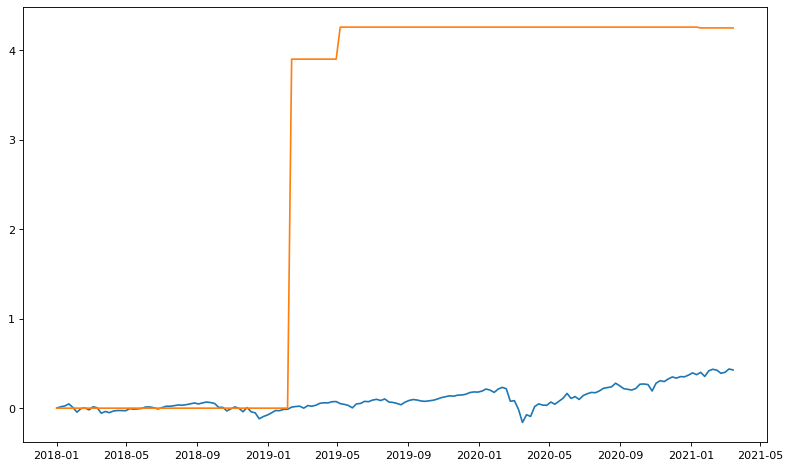

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(12, 7.2), dpi=80)
viz.sort_values("date",inplace=True)
plt.plot(viz["date"],viz["bp"])
plt.plot(viz["date"],viz["pp"])
plt.show()

In [25]:
# industry check
benchmark.groupby(["year","quarter","GICS Sector"]).mean().sort_values("delta",ascending=False).reset_index()[["year","quarter","GICS Sector","delta"]].head(10)

,year,quarter,GICS Sector,delta
0,2019,2,Information Technology,11.617076
1,2019,2,Consumer Discretionary,1.103379
2,2019,2,Consumer Staples,0.285101
3,2019,1,Communication Services,0.139108
4,2021,1,Industrials,0.088046
5,2021,1,Consumer Staples,0.082222
6,2021,1,Consumer Discretionary,0.081135
7,2019,1,Materials,0.066608
8,2019,2,Real Estate,0.055427
9,2019,1,Information Technology,0.055058


In [26]:
benchmark.sort_values("delta",ascending=False).head(20)[["year","quarter","ticker","adjClose","sell_price","delta","Security","date","sell_date"]]

,year,quarter,ticker,adjClose,sell_price,delta,Security,date,sell_date
42,2019,2,ENPH,10.210000,203.380000,18.919687,Enphase Energy,2019-04-29,2021-01-06
41,2019,2,ENPH,10.210000,172.240000,15.869736,Enphase Energy,2019-04-29,2021-01-04
43,2019,2,PENN,22.020000,93.750000,3.257493,Penn National Gaming,2019-04-29,2021-01-08
54,2021,1,AAL,15.000000,23.370000,0.558000,American Airlines Group,2021-01-11,2021-03-12
38,2019,2,CPB,35.803074,46.010560,0.285101,Campbell Soup,2019-04-29,2020-01-02
39,2019,2,LKQ,30.080000,34.860000,0.158910,LKQ Corporation,2019-04-29,2020-01-06
2,2019,1,ENPH,4.920000,5.630000,0.144309,Enphase Energy,2019-01-02,2019-01-09
31,2019,1,DISCA,26.670000,30.380000,0.139108,Discovery (Series A),2019-03-22,2019-04-24
10,2019,1,FCX,10.096907,11.393511,0.128416,Freeport-McMoRan,2019-01-02,2019-01-31
27,2019,1,TER,39.110487,43.583360,0.114365,Teradyne,2019-03-22,2019-04-12


In [27]:
strategy.connect()
quarterly_sim = strategy.retrieve("quarterly_short_sim")
strategy.disconnect()

In [28]:
quarterly_sim

,_id,year,quarter,ticker,quarterly_price_regression_prediction,score,model_training_year,category_training_year
0,616256a709185195f72227e0,2018,1,NSC,126.439575,1.000000,1,0
1,616256a709185195f72227e1,2018,1,ODFL,78.007034,1.000000,1,0
2,616256a709185195f72227e2,2018,1,ODFL,78.007034,1.000000,1,0
3,616256a709185195f72227e3,2018,1,PCAR,55.752640,1.000000,1,0
4,616256a709185195f72227e4,2018,1,PCAR,55.752640,1.000000,1,0
...,...,...,...,...,...,...,...,...
452599,61629b0b09185195f72932dd,2021,4,RMD,146.336594,0.974101,5,4
452600,61629b0b09185195f72932de,2021,4,TXN,110.047600,0.974101,5,4
452601,61629b0c09185195f72932e0,2021,4,TEL,169.505280,0.917058,5,4
452602,61629b0c09185195f72932e1,2021,4,HLT,87.266131,0.917058,5,4
